<a href="https://colab.research.google.com/github/GNSandhya-12/TIC-TAC-TOE/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification of Images from the CIFAR-10 Dataset using ANN (MLP) & CNN**


In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.__version__

'3.8.0'

In [ ]:
tf.__version__

'2.17.1'


Check for GPU
**bold text**

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#physical_devices
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


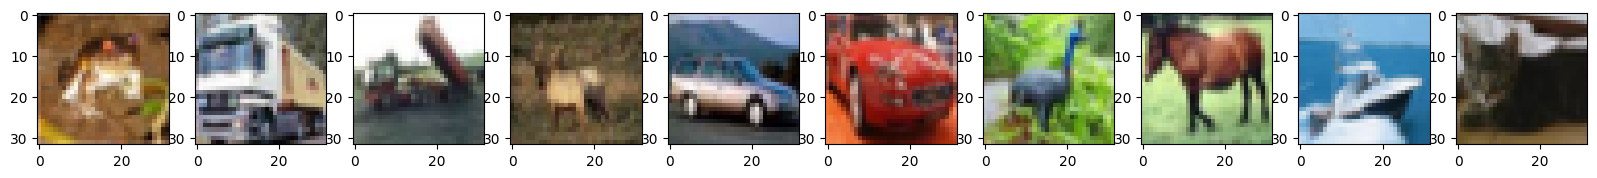

In [ ]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]]))
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

Preparing the dataset


In [ ]:

X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to

MLP Network


I/p Layer - Flatten
Hidden layer - 2048, AF = 'RELU'
O/p Layer - 10 , AF-Softmax


In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2826 - loss: 2.3190 - val_accuracy: 0.3905 - val_loss: 1.7175
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3921 - loss: 1.7001 - val_accuracy: 0.4256 - val_loss: 1.6163
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4169 - loss: 1.6307 - val_accuracy: 0.4220 - val_loss: 1.6335
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4455 - loss: 1.5619 - val_accuracy: 0.4355 - val_loss: 1.5792
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4519 - loss: 1.5413 - val_accuracy: 0.4404 - val_loss: 1.5769
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4630 - loss: 1.5125 - val_accuracy: 0.4487 - val_loss: 1.5437
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4693 - loss: 1.4935 - val_accuracy: 0.4619 - val_loss: 1.5119
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4766 - loss: 1.4689 - 

With the below simple function we will be able to plot our training history.

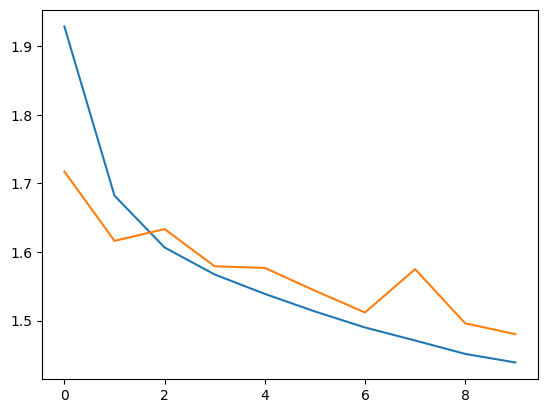

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


CNN Model

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [ ]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

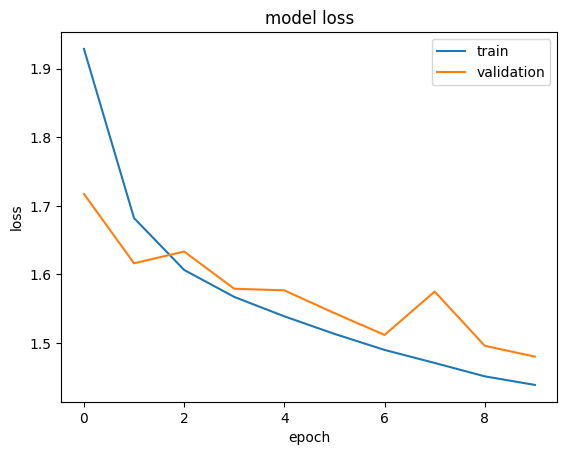

In [ ]:

plotLosses(history)

In [ ]:

def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


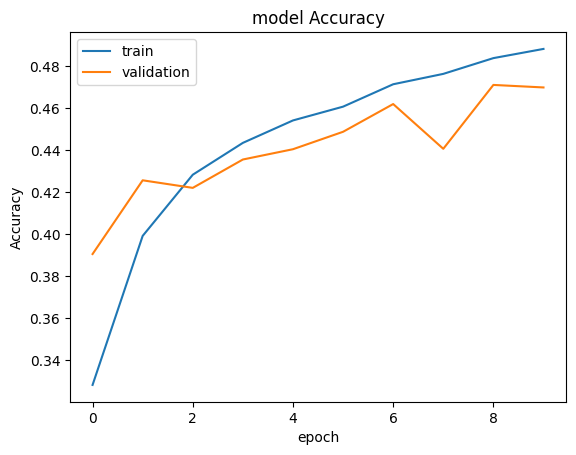

In [ ]:
plotAccuracy(history)

In [ ]:
from keras.models import load_model
cnn.save('model111.h5')

In [ ]:
# Load the model
model = tf.keras.models.load_model('model111.h5')

In [ ]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[20], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[4.2637389e-13, 3.0054079e-09, 3.0381184e-11, 1.3574066e-15,
        9.5906723e-01, 1.0220881e-05, 4.0922638e-02, 3.7775237e-19,
        2.3385375e-14, 1.1456490e-14]], dtype=float32)

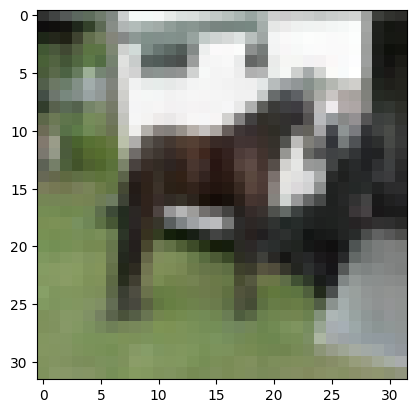

In [ ]:
plt.imshow(x_test[20])

In [ ]:
# Example: if you have class names like this
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace with your actual class names

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted class is: deer


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image

# Function for MobileNetV2 ImageNet model
def mobilenetv2_imagenet():
    st.title("Image Classification with MobileNetV2")

    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image', use_column_width=True)

        st.write("Classifying...")

        # Load MobileNetV2 model
        model = tf.keras.applications.MobileNetV2(weights='imagenet')

        # Preprocess the image
        img = image.resize((224, 224))
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

        # Make predictions
        predictions = model.predict(img_array)
        decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0]

        for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
            st.write(f"{label}: {score * 100:.2f}%")

# Function for CIFAR-10 model
def cifar10_classification():
    st.title("CIFAR-10 Image Classification")

    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image', use_column_width=True)

        st.write("Classifying...")

        # Load CIFAR-10 model
        model = tf.keras.models.load_model('cifar10_model.h5')

        # CIFAR-10 class names
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

        # Preprocess the image
        img = image.resize((32, 32))
        img_array = np.array(img)
        img_array = img_array.astype('float32') / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        confidence = np.max(predictions)

        st.write(f"Predicted Class: {class_names[predicted_class]}")
        st.write(f"Confidence: {confidence * 100:.2f}%")

# Main function to control the navigation
def main():
    st.sidebar.title("Navigation")
    choice = st.sidebar.selectbox("Choose Model", ("CIFAR-10","MobileNetV2 (ImageNet)"))

    if choice == "MobileNetV2 (ImageNet)":
        mobilenetv2_imagenet()
    elif choice == "CIFAR-10":
        cifar10_classification()

if __name__ == "__main__":
    main()

2024-12-03 07:18:33.272 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:18:33.357 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-03 07:18:33.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:18:33.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:18:33.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:18:33.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:18:33.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:18:33.367 Session state does not 

In [ ]:
# Classification of Images from the CIFAR-10 Dataset using CNN.

#MINIST DIGIT CLASSIFICATION BY MLP

# Load the MNIST Dataset

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
mnist = tf.keras.datasets.mnist
#from keras.datasets import mnist #loading the MNIST dataset
import matplotlib.pyplot as plt

** Plot the sample image**

In [ ]:
MNIST_Image_data = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(x_train, y_train),(x_test,y_test)= MNIST_Image_data

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

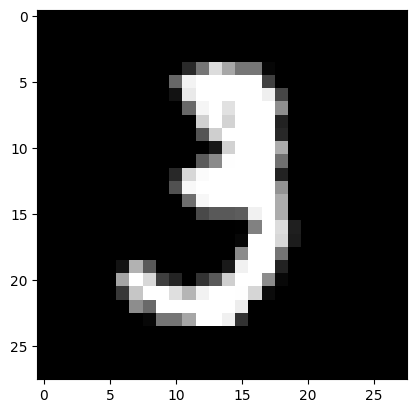

In [ ]:
plt.imshow(x_train[10], cmap= plt.get_cmap('gray'))

### Model building using Multi-Layer Perceptron using MNIST Dataset.


**Import the required libraries**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
x_train.shape[0], x_train.shape[1], x_train.shape[2]

(60000, 28, 28)

# Reshaping the data

In [ ]:

 number_pix = x_train.shape[1] * x_train.shape[2]

In [ ]:
X_train = x_train.reshape(x_train.shape[0], number_pix).astype('float32')
X_test = x_test.reshape(x_test.shape[0], number_pix).astype('float32')

In [ ]:
X_train.shape, X_train.dtype, X_test.shape, X_test.dtype

((60000, 784), dtype('float32'), (10000, 784), dtype('float32'))

# Normalize the data


In [ ]:
X_train = X_train / 255  # Scaling values from (0,255) -> (0,1)
X_test = X_test / 255   # Scaling values from (0,255) -> (0,1)

# One-hot encoding for labels

In [ ]:

from tensorflow.keras.utils import to_categorical

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)  # Use to_categorical directly from tensorflow.keras.utils
Y_test = to_categorical(y_test, n_classes)  # Use to_categorical directly from tensorflow.keras.utils
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Build the MLP model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = Sequential()
model.add(Dense(number_pix, input_shape=(number_pix,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Run the MLP model

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs =10, batch_size = 200, verbose=2)
score = model.evaluate(X_test,Y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

Epoch 1/10
300/300 - 7s - 22ms/step - accuracy: 0.9216 - loss: 0.2757 - val_accuracy: 0.9597 - val_loss: 0.1375
Epoch 2/10
300/300 - 5s - 15ms/step - accuracy: 0.9671 - loss: 0.1128 - val_accuracy: 0.9720 - val_loss: 0.0915
Epoch 3/10
300/300 - 4s - 14ms/step - accuracy: 0.9796 - loss: 0.0718 - val_accuracy: 0.9764 - val_loss: 0.0724
Epoch 4/10
300/300 - 5s - 18ms/step - accuracy: 0.9849 - loss: 0.0524 - val_accuracy: 0.9791 - val_loss: 0.0683
Epoch 5/10
300/300 - 9s - 30ms/step - accuracy: 0.9900 - loss: 0.0372 - val_accuracy: 0.9764 - val_loss: 0.0727
Epoch 6/10
300/300 - 7s - 23ms/step - accuracy: 0.9925 - loss: 0.0274 - val_accuracy: 0.9804 - val_loss: 0.0586
Epoch 7/10
300/300 - 4s - 14ms/step - accuracy: 0.9951 - loss: 0.0200 - val_accuracy: 0.9794 - val_loss: 0.0627
Epoch 8/10
300/300 - 4s - 14ms/step - accuracy: 0.9965 - loss: 0.0149 - val_accuracy: 0.9811 - val_loss: 0.0608
Epoch 9/10
300/300 - 6s - 21ms/step - accuracy: 0.9976 - loss: 0.0115 - val_accuracy: 0.9828 - val_loss:

# Summary

* With the MLP, we got error rate is of 2.05%. Means the accuract is about 98%
* Lets see what will be the accuracy of MNIST digit classification by using CNN. [Chick here](https://github.com/ajju198821/Deep-Learning-Work/blob/main/MNIST_digit_classigication_by_CNN.ipynb) to look at it.


# Build a CNN model to classify CIFAR -10 images.


# Classification of Images from the CIFAR-10 Dataset using CNN.


# Importing libraries

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST Dataset

In [ ]:
MNIST_Image_data = mnist.load_data()

In [ ]:
(x_train, y_train),(x_test, y_test)= MNIST_Image_data
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

**Have a look at sample image**

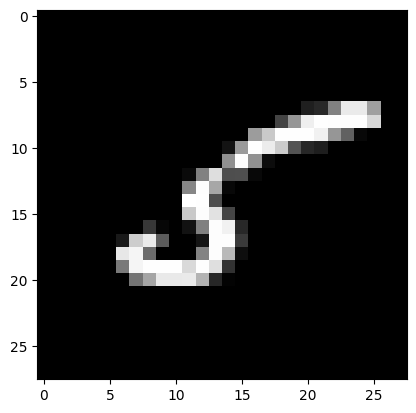

In [ ]:
plt.imshow(x_train[11], cmap= plt.get_cmap('gray'))

## Lets built MNIST digit classification using CNN

Reshape the data

In [ ]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1).astype('float32')
X_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [ ]:
X_train.shape, X_train.dtype, X_test.shape, X_test.dtype

((60000, 28, 28, 1), dtype('float32'), (10000, 28, 28, 1), dtype('float32'))

#### Normalize the data





In [ ]:
X_train = X_train / 255   # Scaling values from (0,255) -> (0,1)
X_test = X_test / 255     # Scaling values from (0,255) -> (0,1)

In [ ]:
X_train[0]


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## One-hot encoding for labels by using Keras numpy utilities`

In [ ]:
y_train, y_train.shape

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), (60000,))

In [ ]:
# Import the necessary function from tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# After onehot encoding
num_classes = 10
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [ ]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

# Building the CNN model

In [ ]:
model = Sequential()
# Add Convolution Layers. Here we are adding only 1 convolution layer. If you want, can add more.
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
#Flatten the output of convolution layer
model.add(Flatten())
#Add hidden layer. here I am ading only one hidden layer.
model.add(Dense(784, activation='relu'))
# Output layer
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 25)          │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 25)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16900)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 784)                 │      13,250,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,258,484 (50.58 MB)

 Trainable params: 13,258,484 (50.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 254s 541ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9836 - val_loss: 0.0729
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 257s 532ms/step - accuracy: 0.9990 - loss: 0.0032 - val_accuracy: 0.9857 - val_loss: 0.0613
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 265s 539ms/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy: 0.9868 - val_loss: 0.0632
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 261s 536ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9865 - val_loss: 0.0670
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 263s 539ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9865 - val_loss: 0.0678
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 257s 548ms/step - accuracy: 0.9992 - loss: 0.0019 - val_accuracy: 0.9880 - val_loss: 0.0626
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 263s 549ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9872 - val_loss: 0.0661
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 263s 551ms/step - accuracy: 0.9995 -

#Summary

* Amazing, we achived ~99.8% accuracy and 98.5% validation accuracy.
* MNIST is a beginner-friendly dataset in computer vision. It’s easy to score 90%+ on validation by using a CNN model with only one convolution layer.